# Отток клиентов

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Чтобы игнорировать предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# извлеяение данных
data = pd.read_csv('/datasets/Churn.csv')
# переименование столбцов
data = data.rename(columns={'RowNumber': 'Row_Number', 'CustomerId': 'Customer_Id', 'CreditScore': 'Credit_Score', 'NumOfProducts': 'Num_Of_Products', 'HasCrCard': 'Has_Cr_Card', 'IsActiveMember': 'Is_Active_Member', 'EstimatedSalary': 'Estimated_Salary'})
data.columns = data.columns.str.lower()

In [3]:
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

У нас есть пропущенные значение в столбце tenure. Заполним медианой и переведём в int64

In [4]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [5]:
data['tenure'] = data['tenure'].astype('Int64')

In [6]:
data

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Извлек данные и изучил их. Нужно было изменить название столбцов с типа camelCase на snake_case. 
Плюс еще в столбце 'tenure' (сколько лет человек является клиентом банка) обнаружил пропуск. Заменил их медианной, а 
также изменил тип с float на int.

## Исследование задачи

**Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.**

Уберем столбцы которые нам не понадобятся при обучении модели: `'surname', 'row_number', 'customer_id'`

In [7]:
data_ohe = data.drop(['surname', 'row_number', 'customer_id'], axis=1)

In [8]:
data_ohe = pd.get_dummies(data_ohe, drop_first=True)

In [9]:
features = data_ohe.drop('exited', axis=1)
target = data_ohe['exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [10]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [11]:
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,567,35,8,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2,147435.96,1,0,0,187508.06,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4,0.00,2,0,1,25684.85,0,0,1
4094,513,29,10,0.00,2,0,1,25514.77,0,0,1
3492,655,45,5,57327.04,1,0,1,47349.00,0,0,0
2177,667,24,4,0.00,2,0,1,34335.55,0,0,0


In [12]:
pd.options.mode.chained_assignment = None # чтобы не было ошибок
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Решающее дерево

In [13]:
%%time

best_result = 0
best_depth = 0
bpv = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    prediction_valid = model.predict(features_valid)
    result = f1_score(target_valid, prediction_valid)
    if result > best_result:
        best_result = result
        best_depth = depth
        bpv = prediction_valid
        
print(f'Лучшая глубина равна {best_depth}, а лучшая f1_score равняется {round(best_result, 4)}')

print(confusion_matrix(target_valid, bpv))

Лучшая глубина равна 6, а лучшая f1_score равняется 0.5337
[[1522   55]
 [ 249  174]]
Wall time: 152 ms


### Случайный лес

In [14]:
%%time

best_result = 0
best_est = 0
bpv = None
for est in range(10, 101, 10):
    model = RandomForestClassifier(n_estimators=est, random_state=12345)
    model.fit(features_train, target_train)
    prediction_valid = model.predict(features_valid)
    result = f1_score(target_valid, prediction_valid)
    if result > best_result:
        best_result = result
        best_est = est
        bpv = prediction_valid

print(f'Лучшее колличество равно {best_est}, а лучшая f1_score равняется {round(best_result, 3)}')
print(confusion_matrix(target_valid, bpv))

Лучшее колличество равно 90, а лучшая f1_score равняется 0.553
[[1518   59]
 [ 239  184]]
Wall time: 3.61 s


### Логическая регрессия

In [15]:
%%time

model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_train, target_train)
prediction_valid = model.predict(features_valid)

print(f'Лучшая f1_score равняется {f1_score(target_valid, prediction_valid)}')

Лучшая f1_score равняется 0.27478260869565213
Wall time: 16 ms


Можно наблюдать, что у модели Случайного леса лучший показатель f1-метрики 

## Улучшите качество модели, учитывая дисбаланс классов. 
Обучите разные модели и найдите лучшую. Кратко опишите выводы.

In [16]:
# функция для увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat(
        [features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat(
        [target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

# функция для уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

Создал функции для увеличение и уменьшения выборки

### Выбираем лучшую модель

#### Решающее дерево

In [17]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

Увеличил и уменьшил выборки. Поэксперементировал. Выборки features_upsampled, target_upsampled показывают лучшие результаты.

In [18]:
%%time

best_result = 0
best_depth = 0
bpv = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    prediction_valid = model.predict(features_valid)
    result = f1_score(target_valid, prediction_valid)
    if result > best_result:
        best_result = result
        best_depth = depth
        bpv = prediction_valid
        
print(f'Глубина - {best_depth}, f1_score - {best_result}')
print(confusion_matrix(target_valid, bpv))

Глубина - 5, f1_score - 0.5809128630705395
[[1316  261]
 [ 143  280]]
Wall time: 200 ms


#### Случайный лес

In [19]:
%%time

best_result = 0
best_est = 0
bpv = None
best_depth = 0
for depth in range(1, 11):
    for est in range(10, 101, 10):
        model = RandomForestClassifier(class_weight='balanced', n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        prediction_valid = model.predict(features_valid)
        result = f1_score(target_valid, prediction_valid)
        if result > best_result:
            best_result = result
            best_est = est
            bpv = prediction_valid
            best_depth = depth

print(f'Колличество - {best_est}, глубина - {best_depth}, f1_score - {best_result}')
print(confusion_matrix(target_valid, bpv))

Колличество - 30, глубина - 10, f1_score - 0.6261980830670926
[[1355  222]
 [ 129  294]]
Wall time: 28.2 s


#### Логическая регрессия

In [20]:
%%time

model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)
prediction_valid = model.predict(features_valid)

print(f'Лучшая f1_score равняется {f1_score(target_valid, prediction_valid)}')
print(confusion_matrix(target_valid, prediction_valid))

Лучшая f1_score равняется 0.4775086505190312
[[1120  457]
 [ 147  276]]
Wall time: 31.1 ms


#### Вывод
f1_score у Случайного леса является наибольшим

### roc_auc_score

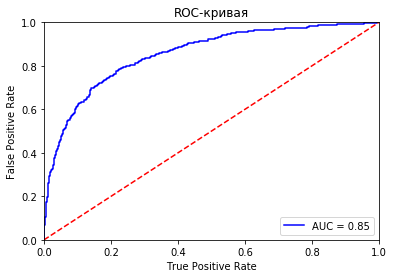

Wall time: 370 ms


In [21]:
%%time
fig, ax = plt.subplots()

model = RandomForestClassifier(class_weight='balanced', n_estimators=30, max_depth=10, random_state=12345)
model.fit(features_upsampled, target_upsampled)
probabilities = model.predict_proba(features_valid)[:,1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

ax.set_title('ROC-кривая')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

Построил ROC кривую для лучшей модели

## Проведите финальное тестирование.

In [22]:
model = RandomForestClassifier(class_weight='balanced', n_estimators=30, max_depth=10, random_state=12345)
model.fit(features_upsampled, target_upsampled)
prediction_test = model.predict(features_test)

print('Значение f1-score равняется', f1_score(target_test, prediction_test))
print(confusion_matrix(target_test, prediction_test))

Значение f1-score равняется 0.6175514626218851
[[1362  220]
 [ 133  285]]


Построил модель с значением F1-score больше 0.61